<a href="https://colab.research.google.com/github/VaibhavJadhav-27/Offensive-Language-Detection-using-ML-models/blob/main/Technical_Seminar_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OFFENSIVE LANGUAGE DETECTION** (ML Model)

---



Importing all Libraries

In [ ]:
import string
import nltk
import pandas as pd
import numpy as np
import nltk
!pip install textstat
!pip install better-profanity
from better_profanity import profanity
from textstat.textstat import *
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import nltk
nltk.download('vader_lexicon')
from wordcloud import WordCloud
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import seaborn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.8 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Loading the dataset

In [ ]:
hate_speech_df = pd.read_csv("/content/drive/MyDrive/Dataset/HateSpeechData.csv")
hate_speech_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
hate_speech_df = hate_speech_df.drop(columns=['Unnamed: 0'])
hate_speech_df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
hate_speech_df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
hate_speech_df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

Text(0.5, 1.0, 'Count of Tweets per Class')

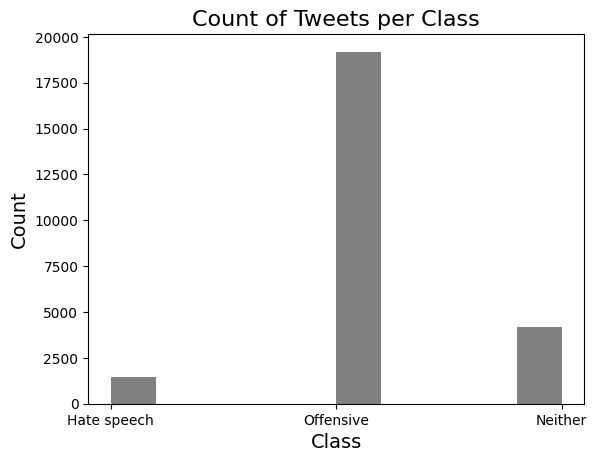

In [ ]:
plt.hist(hate_speech_df['class'], color = 'grey', align='mid')
plt.ylabel('Count', fontsize=14)
col_names=['Hate speech','Offensive',"Neither"]
x_values = np.arange(0, len(col_names))


plt.xticks(x_values, col_names)
plt.xlabel('Class', fontsize=14)
plt.title('Count of Tweets per Class', fontsize = 16)

In [ ]:
tweet=hate_speech_df.tweet
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

#loading the stopwords library
stopwords = nltk.corpus.stopwords.words("english")

#adding other words to remove
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()

def preprocess(tweet):

    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of mentions (@name)
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of URLs
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')

    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # replace whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()

    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())

    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])

    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet

    return tweets_p

processed_tweets = preprocess(tweet)

hate_speech_df['processed_tweets'] = processed_tweets
print(hate_speech_df[["tweet","processed_tweets"]].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

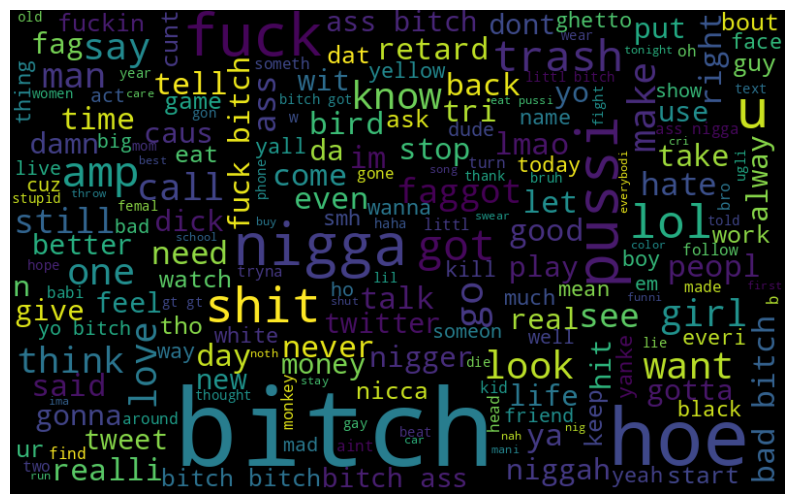

In [ ]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in hate_speech_df['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(hate_speech_df['processed_tweets'])


#transforming the TF_IDF matrix to an array for the future transformations
tfidf_a = tfidf.toarray()

print(tfidf)

  (0, 5549)	0.4309517500614609
  (0, 5823)	0.21292360474103067
  (0, 5536)	0.2694725323170756
  (0, 103)	0.2848504306418305
  (0, 3639)	0.2500076439754137
  (0, 124)	0.22951771468335722
  (0, 2896)	0.32473278046308335
  (0, 1189)	0.37180372772740344
  (0, 1266)	0.37805333846740247
  (0, 6262)	0.33673876130852654
  (1, 1455)	0.35408569797294004
  (1, 4385)	0.29402989193760287
  (1, 5340)	0.3008029767463628
  (1, 2717)	0.12204320836205955
  (1, 1388)	0.37776257623201304
  (1, 321)	0.20828940991978914
  (1, 5944)	0.35642794983844883
  (1, 1221)	0.3008029767463628
  (1, 1453)	0.47084617485060926
  (1, 892)	0.2397588136195512
  (2, 723)	0.4025857370799935
  (2, 2121)	0.26875711871483904
  (2, 1802)	0.4334907503536408
  (2, 5054)	0.19413584053699529
  (2, 1279)	0.366125652299236
  :	:
  (24780, 960)	0.343011332843257
  (24780, 63)	0.37409643142606824
  (24780, 4095)	0.26604418498734955
  (24780, 1544)	0.2613777761879398
  (24780, 2187)	0.2280990649157048
  (24780, 1713)	0.21384505532921141
 

In [ ]:
sentiment_analyzer = VS()
def count_tags(tweet_c):

    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

sentiment_features = sentiment_analysis_array(tweet)
#Here we use the original tweets, not the pre processed ones

new_features = pd.DataFrame({'Neg':sentiment_features[:,0],'Pos':sentiment_features[:,1],'Neu':sentiment_features[:,2],'Compound':sentiment_features[:,3],
                            'url_tag':sentiment_features[:,4],'mention_tag':sentiment_features[:,5],'hash_tag':sentiment_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


In [ ]:
# Initialize the model
#The input is a list of TaggedDocument(['list','of','word'], [TAG_001]).
#We use the indexes of the tweets as tags
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(hate_speech_df["processed_tweets"].apply(lambda x: x.split(" ")))]

# training of the model
doc2vec_model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

# transform each document (tweet) into a vector data
doc2vec_df = hate_speech_df["processed_tweets"].apply(lambda x: doc2vec_model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,-0.000284,0.039009,0.014284,-0.097681,0.027765
1,0.243611,-0.037732,0.252658,-0.001160,-0.145342
2,0.006404,0.184756,-0.078888,0.108070,0.071965
3,0.106016,0.066922,0.058802,-0.009030,-0.031720
4,-0.092766,0.011201,0.038034,-0.001070,-0.045977
...,...,...,...,...,...
24778,0.377421,0.044155,0.190397,-0.185916,-0.064086
24779,0.003670,0.036980,0.061850,0.030808,-0.009146
24780,-0.059037,0.230479,0.133131,0.250086,-0.193989
24781,0.106409,0.009444,0.019622,-0.135629,-0.080113


In [ ]:
def additional_features(tweet):

    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))


    #Modified FKRA grade, where average words per sentence is : number of words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)

    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

fFeatures = get_additonal_feature_array(processed_tweets)

df_fFeatures = pd.DataFrame(fFeatures)
df_fFeatures

,0,1,2,3,4,5,6,7
0,3.7,84.90,12.0,1.3333,50.0,50.0,9.0,9.0
1,2.6,95.69,13.0,1.1818,49.0,49.0,11.0,10.0
2,2.3,92.97,10.0,1.2500,42.0,42.0,8.0,8.0
3,1.3,91.00,4.0,1.3332,16.0,16.0,3.0,3.0
4,1.0,103.70,10.0,1.1111,46.0,46.0,9.0,8.0
...,...,...,...,...,...,...,...,...
24778,1.0,103.70,10.0,1.1111,49.0,49.0,9.0,9.0
24779,0.8,103.54,9.0,1.1250,47.0,47.0,8.0,8.0
24780,2.5,95.17,12.0,1.2000,51.0,51.0,10.0,10.0
24781,-1.4,116.15,6.0,1.0000,30.0,30.0,6.0,6.0


In [ ]:
final_features = np.concatenate([tfidf_a,sentiment_features,fFeatures],axis=1)
final_features.shape

(24783, 6456)

In [ ]:
X = pd.DataFrame(final_features)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
#Undersampling
#Undersampling resamples the majority class points in the data to make them equal to the minority class points

rus = RandomUnderSampler(random_state=0)
X_resampled_under, y_resampled_under =rus.fit_resample(X_train, y_train)

In [ ]:
y_resampled_under.value_counts()

0    1151
1    1151
2    1151
Name: class, dtype: int64

In [ ]:
#Oversampling with SMOTE
#Oversampling refers to the resampling of the minority class points to equal the total number of majority points
smote=SMOTE(random_state=10)
X_sm,y_sm=smote.fit_resample(X_train,y_train)

In [ ]:
y_sm.value_counts()

1    15338
2    15338
0    15338
Name: class, dtype: int64

**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       279
           1       0.81      0.96      0.88      3852
           2       0.59      0.29      0.39       826

    accuracy                           0.80      4957
   macro avg       0.47      0.42      0.42      4957
weighted avg       0.73      0.80      0.75      4957

Logistic Regression, Accuracy Score: 0.795239055880573


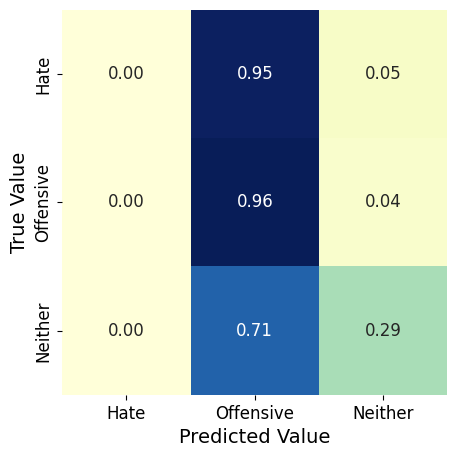

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**Random Forest**

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.48      0.05      0.10       279
           1       0.90      0.97      0.93      3852
           2       0.84      0.75      0.79       826

    accuracy                           0.88      4957
   macro avg       0.74      0.59      0.61      4957
weighted avg       0.86      0.88      0.86      4957

Random Forest, Accuracy Score: 0.8838006858987291


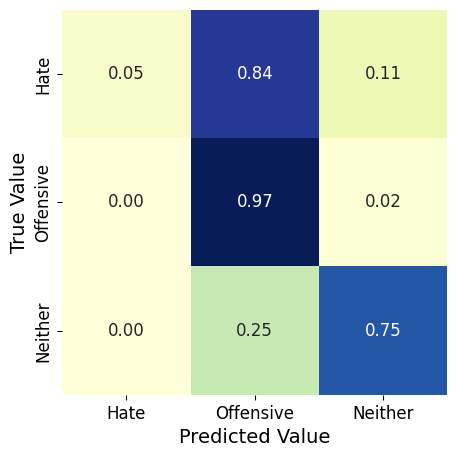

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**Support Vector Machine**

In [ ]:
lsvc =LinearSVC(random_state=20)
lsvc.fit(X_train,y_train)
y_preds = lsvc.predict(X_test)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Linear SVC, Accuracy Score:" ,acc2 )

              precision    recall  f1-score   support

           0       0.59      0.09      0.15       279
           1       0.89      0.98      0.93      3852
           2       0.86      0.70      0.77       826

    accuracy                           0.88      4957
   macro avg       0.78      0.59      0.62      4957
weighted avg       0.86      0.88      0.86      4957

Linear SVC, Accuracy Score: 0.8791607827314908


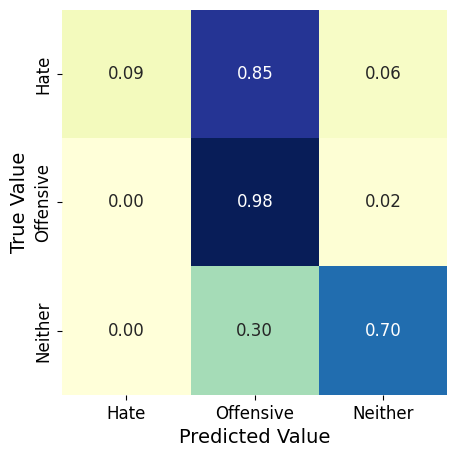

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**KNN**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_preds = neigh.predict(X_test)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("KNN, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.09      0.08      0.08       279
           1       0.81      0.89      0.85      3852
           2       0.38      0.21      0.27       826

    accuracy                           0.73      4957
   macro avg       0.42      0.39      0.40      4957
weighted avg       0.70      0.73      0.71      4957

KNN, Accuracy Score: 0.7339116401049022


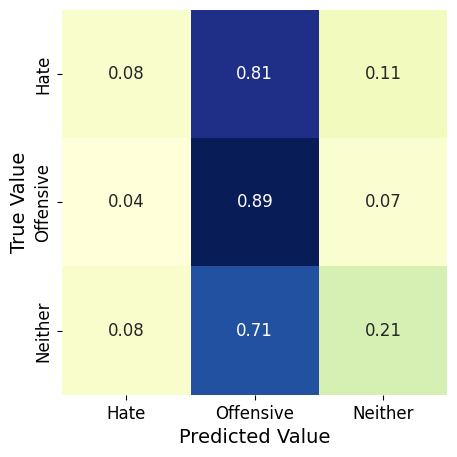

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_preds = dt.predict(X_test)
acc4 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("DT, Accuracy score :",acc4)

              precision    recall  f1-score   support

           0       0.29      0.29      0.29       279
           1       0.93      0.93      0.93      3852
           2       0.83      0.83      0.83       826

    accuracy                           0.88      4957
   macro avg       0.68      0.68      0.68      4957
weighted avg       0.88      0.88      0.88      4957

DT, Accuracy score : 0.8761347589267702


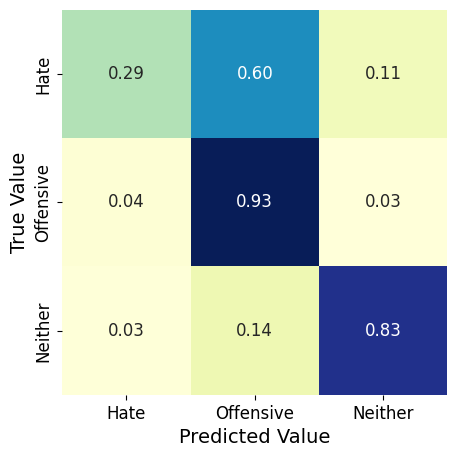

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**AdaBoost Classifier**

In [ ]:
ad = AdaBoostClassifier(n_estimators=100, random_state=0)
ad.fit(X_train,y_train)
y_preds = ad.predict(X_test)
acc5 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("AdaBoost, Accuracy score :",acc5)

              precision    recall  f1-score   support

           0       0.52      0.21      0.30       279
           1       0.94      0.95      0.95      3852
           2       0.81      0.92      0.86       826

    accuracy                           0.91      4957
   macro avg       0.76      0.69      0.70      4957
weighted avg       0.89      0.91      0.90      4957

AdaBoost, Accuracy score : 0.9055880572927174


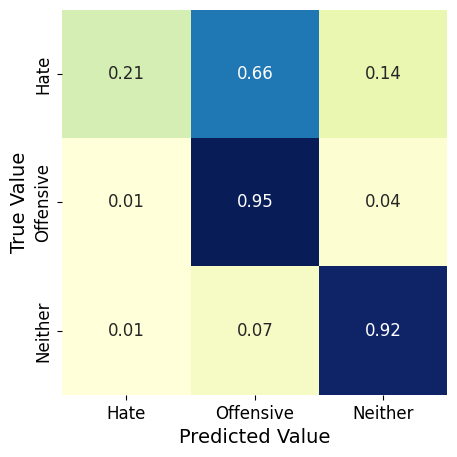

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

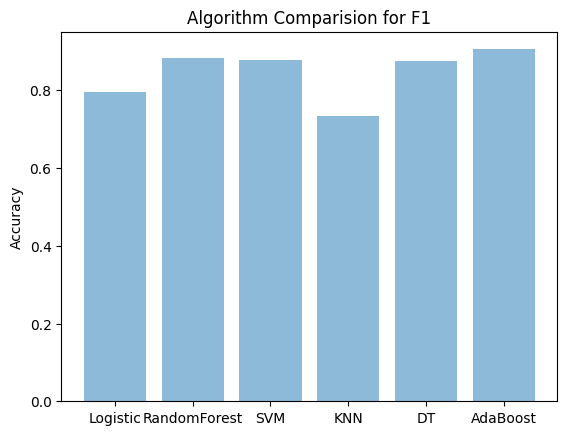

In [ ]:
objects = ('Logistic', 'RandomForest', 'SVM', 'KNN','DT','AdaBoost')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3,acc4,acc5]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

**Saving Trained models**

In [ ]:
import pickle

pickle.dump(lr, open('/content/drive/MyDrive/Dataset/lr_model_saved', 'wb'))
pickle.dump(rf, open('/content/drive/MyDrive/Dataset/rf_model_saved', 'wb'))
pickle.dump(lsvc, open('/content/drive/MyDrive/Dataset/lsvc_model_saved', 'wb'))
pickle.dump(neigh, open('/content/drive/MyDrive/Dataset/neigh_model_saved', 'wb'))
pickle.dump(dt, open('/content/drive/MyDrive/Dataset/dt_model_saved', 'wb'))
pickle.dump(ad, open('/content/drive/MyDrive/Dataset/ad_model_saved', 'wb'))

**Training Models while under sampling the data to reduce bias**

**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_resampled_under,y_resampled_under)
y_preds = lr.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc11=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc11)

              precision    recall  f1-score   support

           0       0.10      0.48      0.17       279
           1       0.92      0.48      0.63      3852
           2       0.38      0.74      0.50       826

    accuracy                           0.52      4957
   macro avg       0.47      0.57      0.43      4957
weighted avg       0.79      0.52      0.58      4957

Logistic Regression, Accuracy Score: 0.5247125277385516


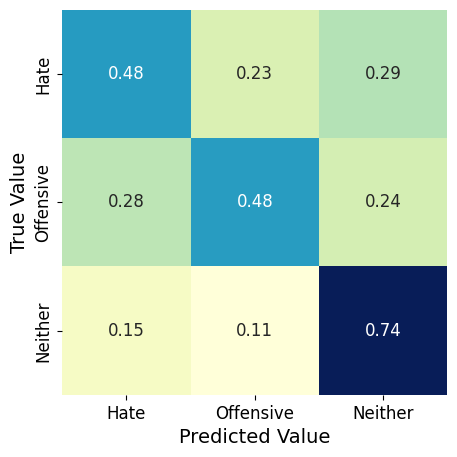

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**Random Forest Classifier**

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_resampled_under,y_resampled_under)
y_preds = rf.predict(X_test)
acc7=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc7)

              precision    recall  f1-score   support

           0       0.23      0.65      0.34       279
           1       0.98      0.79      0.87      3852
           2       0.71      0.90      0.79       826

    accuracy                           0.80      4957
   macro avg       0.64      0.78      0.67      4957
weighted avg       0.89      0.80      0.83      4957

Random Forest, Accuracy Score: 0.7982650796852935


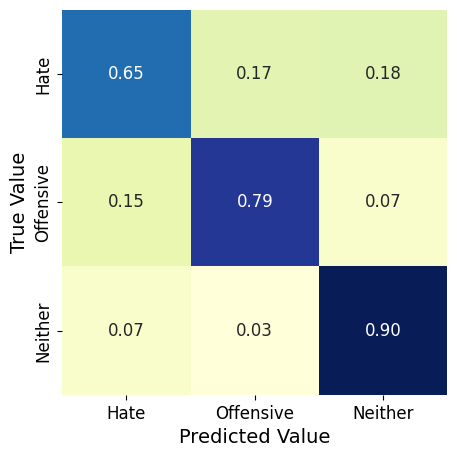

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**SVM**

In [ ]:
lsvc =LinearSVC(random_state=20)
lsvc.fit(X_resampled_under,y_resampled_under)
y_preds = lsvc.predict(X_test)
acc8=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Linear SVC, Accuracy Score:" ,acc8 )

              precision    recall  f1-score   support

           0       0.45      0.19      0.27       279
           1       0.81      0.98      0.89      3852
           2       0.88      0.23      0.36       826

    accuracy                           0.81      4957
   macro avg       0.71      0.46      0.51      4957
weighted avg       0.80      0.81      0.77      4957

Linear SVC, Accuracy Score: 0.8081500907807141


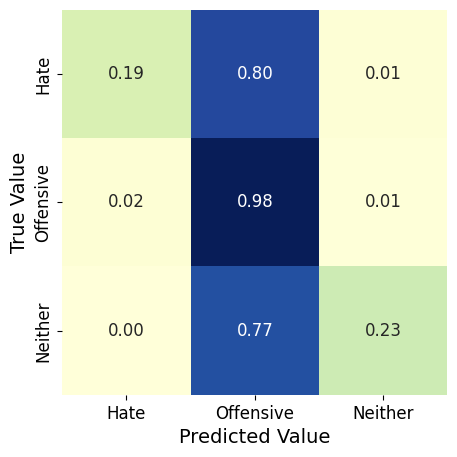

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**KNN**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_resampled_under,y_resampled_under)
y_preds = neigh.predict(X_test)
acc9=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("KNN, Accuracy Score:" ,acc9 )

              precision    recall  f1-score   support

           0       0.07      0.57      0.13       279
           1       0.85      0.37      0.52      3852
           2       0.27      0.37      0.31       826

    accuracy                           0.38      4957
   macro avg       0.40      0.44      0.32      4957
weighted avg       0.71      0.38      0.46      4957

KNN, Accuracy Score: 0.3826911438369982


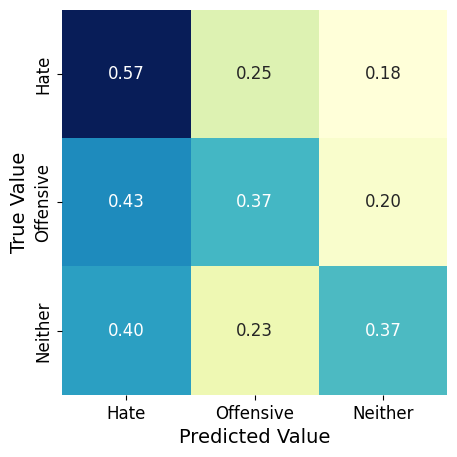

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_resampled_under,y_resampled_under)
y_preds = dt.predict(X_test)
acc10 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("DT, Accuracy score :",acc10)

              precision    recall  f1-score   support

           0       0.17      0.67      0.28       279
           1       0.97      0.75      0.84      3852
           2       0.78      0.85      0.82       826

    accuracy                           0.76      4957
   macro avg       0.64      0.76      0.64      4957
weighted avg       0.89      0.76      0.81      4957

DT, Accuracy score : 0.7607423845067581


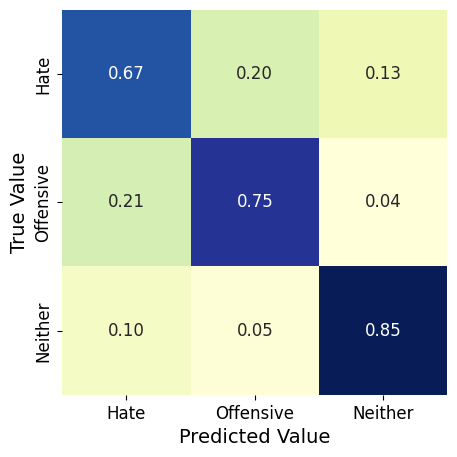

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**AdaBoost**

In [ ]:
ad1 = AdaBoostClassifier(n_estimators=100, random_state=0)
ad1.fit(X_resampled_under,y_resampled_under)
y_preds = ad1.predict(X_test)
acc6 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("AdaBoost, Accuracy score :",acc6)

              precision    recall  f1-score   support

           0       0.14      0.69      0.23       279
           1       0.97      0.65      0.78      3852
           2       0.77      0.92      0.84       826

    accuracy                           0.70      4957
   macro avg       0.63      0.75      0.62      4957
weighted avg       0.89      0.70      0.76      4957

AdaBoost, Accuracy score : 0.6971958846076256


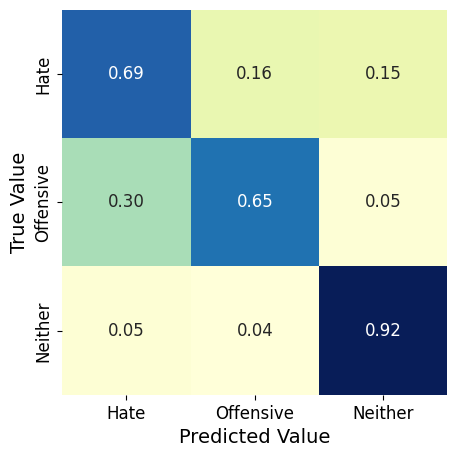

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

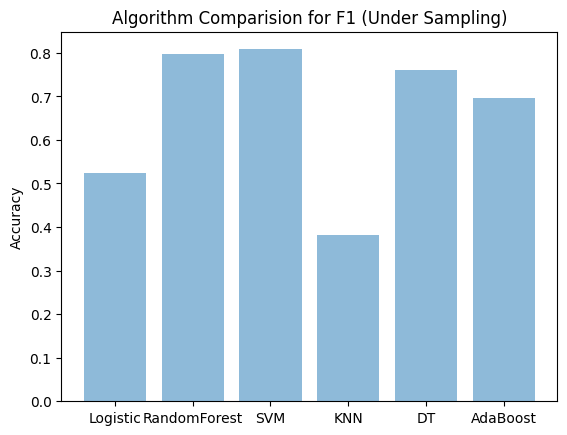

In [ ]:
objects = ('Logistic', 'RandomForest', 'SVM', 'KNN','DT','AdaBoost')
y_pos = np.arange(len(objects))
performance = [acc11,acc7,acc8,acc9,acc10,acc6]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1 (Under Sampling)')
plt.show()

In [ ]:
import pickle

pickle.dump(lr, open('/content/drive/MyDrive/Dataset/lr_u_model_saved', 'wb'))
pickle.dump(rf, open('/content/drive/MyDrive/Dataset/rf_u_model_saved', 'wb'))
pickle.dump(lsvc, open('/content/drive/MyDrive/Dataset/lsvc_u_model_saved', 'wb'))
pickle.dump(neigh, open('/content/drive/MyDrive/Dataset/neigh_u_model_saved', 'wb'))
pickle.dump(dt, open('/content/drive/MyDrive/Dataset/dt_u_model_saved', 'wb'))
pickle.dump(ad1, open('/content/drive/MyDrive/Dataset/ad_u_model_saved', 'wb'))

**Training Models while over sampling the data to reduce bias**

**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_sm,y_sm)
y_preds = lr.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc12=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc12)

              precision    recall  f1-score   support

           0       0.09      0.39      0.15       279
           1       0.91      0.50      0.65      3852
           2       0.38      0.75      0.51       826

    accuracy                           0.54      4957
   macro avg       0.46      0.55      0.43      4957
weighted avg       0.78      0.54      0.60      4957

Logistic Regression, Accuracy Score: 0.5386322372402663


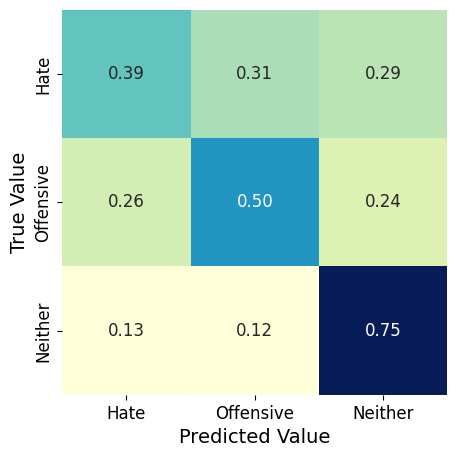

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**Random Forest Classifier**

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_sm,y_sm)
y_preds = rf.predict(X_test)
acc13=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc13)

              precision    recall  f1-score   support

           0       0.48      0.24      0.32       279
           1       0.92      0.95      0.94      3852
           2       0.82      0.82      0.82       826

    accuracy                           0.89      4957
   macro avg       0.74      0.67      0.69      4957
weighted avg       0.88      0.89      0.88      4957

Random Forest, Accuracy Score: 0.8916683477910026


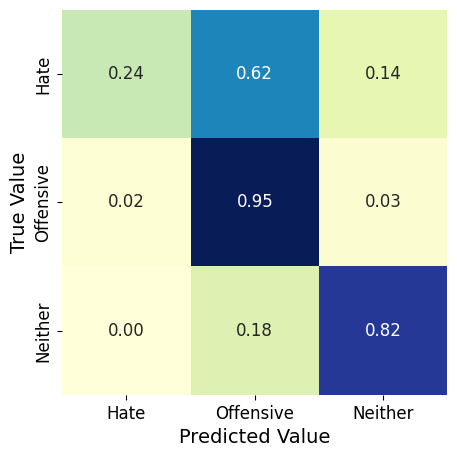

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**SVM**

In [ ]:
lsvc =LinearSVC(random_state=20)
lsvc.fit(X_sm,y_sm)
y_preds = lsvc.predict(X_test)
acc14=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Linear SVC, Accuracy Score:" ,acc14 )

              precision    recall  f1-score   support

           0       0.48      0.27      0.34       279
           1       0.96      0.90      0.92      3852
           2       0.67      0.96      0.79       826

    accuracy                           0.87      4957
   macro avg       0.70      0.71      0.68      4957
weighted avg       0.88      0.87      0.87      4957

Linear SVC, Accuracy Score: 0.8704861811579584


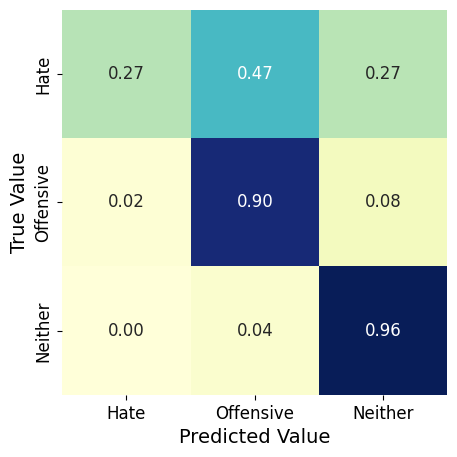

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**KNN**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_sm,y_sm)
y_preds = neigh.predict(X_test)
acc15=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("KNN, Accuracy Score:" ,acc15 )

              precision    recall  f1-score   support

           0       0.07      0.34      0.12       279
           1       0.85      0.46      0.59      3852
           2       0.26      0.50      0.34       826

    accuracy                           0.46      4957
   macro avg       0.39      0.43      0.35      4957
weighted avg       0.71      0.46      0.53      4957

KNN, Accuracy Score: 0.4569295945128102


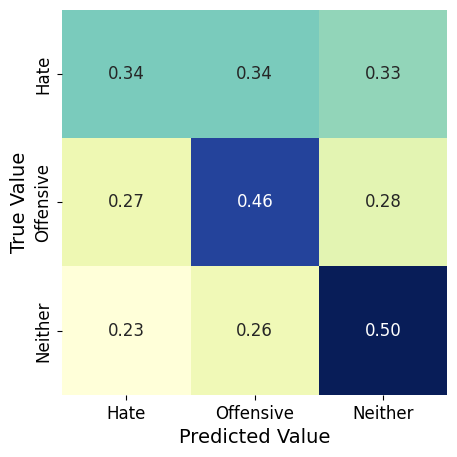

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_sm,y_sm)
y_preds = dt.predict(X_test)
acc16 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("DT, Accuracy score :",acc16)

              precision    recall  f1-score   support

           0       0.29      0.37      0.32       279
           1       0.94      0.91      0.92      3852
           2       0.80      0.84      0.82       826

    accuracy                           0.87      4957
   macro avg       0.68      0.71      0.69      4957
weighted avg       0.88      0.87      0.87      4957

DT, Accuracy score : 0.8670566875126084


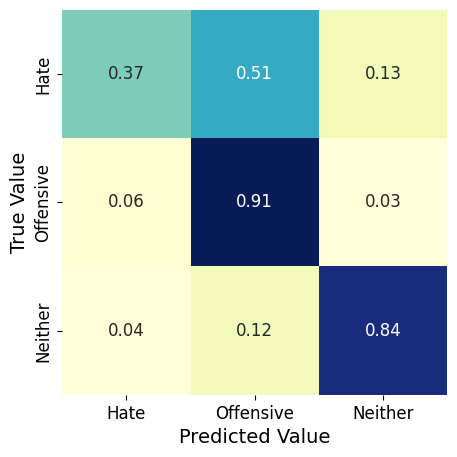

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

**AdaBoost**

In [ ]:

ad = AdaBoostClassifier(n_estimators=100, random_state=0)
ad.fit(X_sm,y_sm)
y_preds = ad.predict(X_test)
acc17 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("AdaBoost, Accuracy score :",acc17)

              precision    recall  f1-score   support

           0       0.39      0.51      0.45       279
           1       0.96      0.90      0.93      3852
           2       0.77      0.94      0.85       826

    accuracy                           0.88      4957
   macro avg       0.71      0.78      0.74      4957
weighted avg       0.90      0.88      0.89      4957

AdaBoost, Accuracy score : 0.8811781319346379


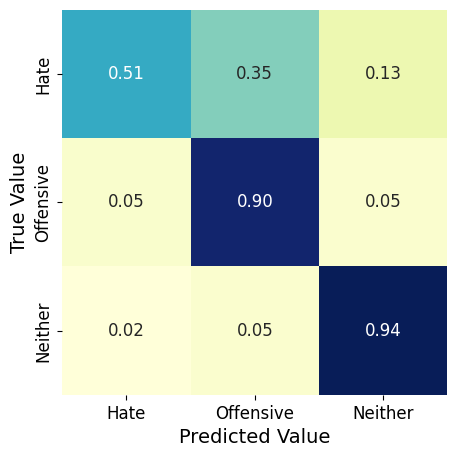

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

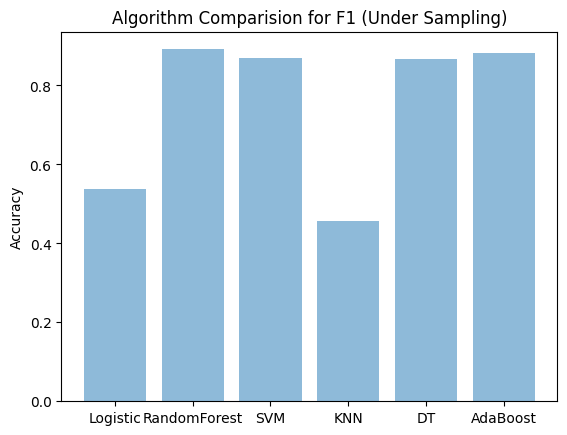

In [ ]:
objects = ('Logistic', 'RandomForest', 'SVM', 'KNN','DT','AdaBoost')
y_pos = np.arange(len(objects))
performance = [acc12,acc13,acc14,acc15,acc16,acc17]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1 (Under Sampling)')
plt.show()

In [ ]:
import pickle

pickle.dump(lr, open('/content/drive/MyDrive/Dataset/lr_o_model_saved', 'wb'))
pickle.dump(rf, open('/content/drive/MyDrive/Dataset/rf_o_model_saved', 'wb'))
pickle.dump(lsvc, open('/content/drive/MyDrive/Dataset/lsvc_o_model_saved', 'wb'))
pickle.dump(neigh, open('/content/drive/MyDrive/Dataset/neigh_o_model_saved', 'wb'))
pickle.dump(dt, open('/content/drive/MyDrive/Dataset/dt_o_model_saved', 'wb'))
pickle.dump(ad, open('/content/drive/MyDrive/Dataset/ad_o_model_saved', 'wb'))

**After Hyper tunning parameters**

In [ ]:
ad_h = AdaBoostClassifier(n_estimators=388, learning_rate=0.12924753036297487, random_state=1)
ad_h.fit(X_train, y_train)
y_preds = ad_h.predict(X_test)
acc20 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("AdaBoost, Accuracy score :",acc20)

              precision    recall  f1-score   support

           0       0.57      0.10      0.18       279
           1       0.93      0.96      0.95      3852
           2       0.81      0.94      0.87       826

    accuracy                           0.91      4957
   macro avg       0.77      0.67      0.66      4957
weighted avg       0.89      0.91      0.89      4957

AdaBoost, Accuracy score : 0.9061932620536615


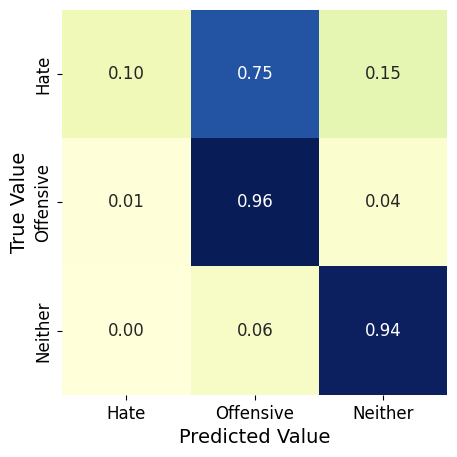

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [ ]:
ad_hu = AdaBoostClassifier(n_estimators=178, learning_rate=0.15184063534692668, random_state=1)
ad_hu.fit(X_resampled_under,y_resampled_under)
y_preds = ad_hu.predict(X_test)
acc21 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("AdaBoost, Accuracy score :",acc21)

              precision    recall  f1-score   support

           0       0.28      0.63      0.39       279
           1       0.98      0.84      0.90      3852
           2       0.77      0.95      0.85       826

    accuracy                           0.85      4957
   macro avg       0.67      0.81      0.71      4957
weighted avg       0.90      0.85      0.86      4957

AdaBoost, Accuracy score : 0.8452693161186201


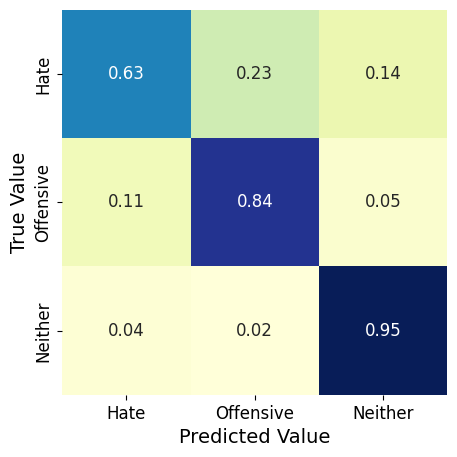

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [ ]:
ad_ho = AdaBoostClassifier(n_estimators=361, learning_rate=0.3277546997141216, random_state=1)
ad_ho.fit(X_sm,y_sm)
y_preds = ad_ho.predict(X_test)
acc22 =  accuracy_score(y_test,y_preds)
report = classification_report(y_test,y_preds)
print(report)
print("AdaBoost, Accuracy score :",acc22)

              precision    recall  f1-score   support

           0       0.44      0.47      0.46       279
           1       0.96      0.92      0.94      3852
           2       0.79      0.95      0.87       826

    accuracy                           0.90      4957
   macro avg       0.73      0.78      0.75      4957
weighted avg       0.90      0.90      0.90      4957

AdaBoost, Accuracy score : 0.8971151906394997


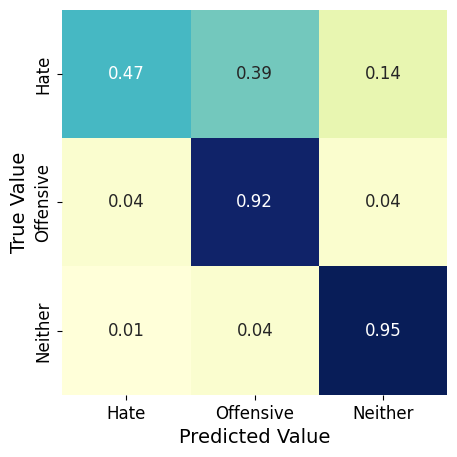

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

In [ ]:
import pickle

pickle.dump(ad_h, open('/content/drive/MyDrive/Dataset/ad_h_model_saved', 'wb'))
pickle.dump(ad_hu, open('/content/drive/MyDrive/Dataset/ad_hu_model_saved', 'wb'))
pickle.dump(ad_ho, open('/content/drive/MyDrive/Dataset/ad_ho_model_saved', 'wb'))

In [ ]:
import pickle
final_model = pickle.load(open('/content/drive/MyDrive/Dataset/ad_ho_model_saved', 'rb'))

In [ ]:
from sklearn.preprocessing import StandardScaler
def get_predictions(tweet):
    #Convert the string to a panda serie in order to apply the following functions
    tweet = pd.Series(tweet)
    #Get the sentiment analysis of the un-preprocessed string
    #we need to apply this function when the string is not yet pre processed in order to keep the whole meaning
    #of the sentence, like the # for exemple
    array_sentiment_analysis = sentiment_analysis_array(tweet)
    #Now that we have extract the sentiment from the sentence, let pre-process our tweet
    preprocessed_tweet = preprocess(tweet)
    #We convert our string into a matrix
    array_tfidf = tfidf_vectorizer(tweet)
    #Add additional featutre
    additional_features = get_additonal_feature_array(tweet)
    #Concatenate all the features
    features_tweet_test = np.concatenate([array_tfidf,array_sentiment_analysis,additional_features],axis=1)
    #Transform our array to a dataframe
    df = pd.DataFrame(features_tweet_test)
    #df = df.iloc[:, :1].values
    #We apply our model to our tweet
    pred = final_model.predict(df)
    #Re code the labels
    if pred == 0:
        return "Hate speech"
    elif pred == 1:
        return "Offensive language"
    elif pred == 2:
        return "Neither"
    else:
        return "No label"
    return pred


In [ ]:
tweet1 = ""

result =  get_predictions(tweet1)
if(result in ["Hate speech", "Offensive language"]):
  censored_text = profanity.censor(tweet1)
  print(censored_text)

**Implementing code and trained model in a file**

In [ ]:
#Downloading Streamlit

!pip install streamlit -q
!npm install -g localtunnel
!pip install textstat
!pip install better-profanity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.7 MB/s eta 0:00:00
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.534s
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 818.1 kB/s eta 0:00:00


In [ ]:
%%writefile /content/drive/MyDrive/Dataset/templates/app.py


import string
import nltk
import time
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from textstat.textstat import *
from better_profanity import profanity
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import streamlit as st
import pickle
final_model = pickle.load(open('/content/drive/MyDrive/Dataset/ad_u_model_saved', 'rb'))

sentiment_analyzer = VS()
def count_tags(tweet_c):

    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))



def sentiment_analysis(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

stopwords = nltk.corpus.stopwords.words("english")

#adding other words to remove
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()

def preprocess(tweet):
    stopwords = nltk.corpus.stopwords.words("english")

    #adding other words to remove
    other_exclusions = ["#ff", "ff", "rt"]
    stopwords.extend(other_exclusions)

    stemmer = PorterStemmer()
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')

    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    tweet_lower = newtweet.str.lower()

    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet

    return tweets_p


def tfidf_vectorizer(tweet,df1):
    tweet = pd.Series(tweet)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=1, min_df=1, max_features=10000)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
    tfidf_vectorizer.fit_transform(df1)
    tfidf_string = tfidf_vectorizer.transform(tweet)
    tfidf_array = tfidf_string.toarray()
    return tfidf_array



def additional_features(tweet):

    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))


    #Modified FKRA grade, where average words per sentence is : number of words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)

    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)


def initialise():
    hate_speech_df = pd.read_csv("/content/drive/MyDrive/Dataset/HateSpeechData.csv")
    hate_speech_df = hate_speech_df.drop(columns=['Unnamed: 0'])
    tweet=hate_speech_df.tweet
    processed_tweets = preprocess(tweet)
    hate_speech_df['processed_tweets'] = processed_tweets
    return hate_speech_df['processed_tweets']




from sklearn.preprocessing import StandardScaler
def get_predictions(tweet):

    ##hate_speech_df['processed_tweets'] = initialise()
    hate_speech_df = pd.read_csv("/content/drive/MyDrive/Dataset/HateSpeechData.csv")
    hate_speech_df = hate_speech_df.drop(columns=['Unnamed: 0'])
    tweet1=hate_speech_df.tweet
    processed_tweets = preprocess(tweet1)
    hate_speech_df['processed_tweets'] = processed_tweets

    tweet = pd.Series(tweet)

    array_sentiment_analysis = sentiment_analysis_array(tweet)

    preprocessed_tweet = preprocess(tweet)


    array_tfidf = tfidf_vectorizer(tweet,hate_speech_df['processed_tweets'])

    additional_features = get_additonal_feature_array(tweet)

    features_tweet_test = np.concatenate([array_tfidf,array_sentiment_analysis,additional_features],axis=1)

    df = pd.DataFrame(features_tweet_test)

    pred = final_model.predict(df)
    #Re code the labels
    if pred == 0:
        return "Hate speech"
    elif pred == 1:
        return "Offensive language"
    elif pred == 2:
        return "Neither"
    else:
        return "No label"
    return pred


def my_function(tweet):
    result = get_predictions(tweet)
    for i in range(20):
        time.sleep(1)
        st.spinner(f"Processing... {i+1}/10")
        if(len(result)!=0):
          i=9
          return result

    return "Function completed!"


def main():

  st.title("Offensive language Detection Model")
  st.sidebar.write("This is a Offensive Language Detection model.")
  st.sidebar.write("It is used to detect whether the text is Offensive or HateFul.")
  st.sidebar.write("Implemented By : Vaibhav Jadhav")
  st.sidebar.write("Roll No : 212010041")
  st.markdown(
        """
        <style>
        .stTextInput > div > div > input {
            font-size: 18px;
            padding: 8px;
        }
        /* Increase the width of the button */
        .stButton>button {
            width: 250px;
        }
        </style>
        """,
        unsafe_allow_html=True,
    )
  tweet = st.text_input('Enter the tweet : ', '')
  if(st.button('Classify Tweet')):
    if(len(tweet)>0):
      with st.spinner("Processing..."):
        result = my_function(tweet)
        st.success(result)
        if(result in ["Hate speech", "Offensive language"]):
          censored_text  = profanity.censor(tweet)
          st.write('Censored Tweet :  ',censored_text)




if __name__=='__main__':
  custom_badwords = ['black', 'hatred', 'sexx', 'hate']
  profanity.add_censor_words(custom_badwords)
  main()


Overwriting /content/drive/MyDrive/Dataset/templates/app.py


In [ ]:
#Running the Model using StreamLit and Local Tunnel
!streamlit run /content/drive/MyDrive/Dataset/templates/app.py & npx localtunnel --port 8501

npx: installed 22 in 3.706s


your url is: https://wild-pumas-thank.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.220.110:8501

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already